# 911 Calls Capstone Project

## Data and Setup

In [34]:
#Import numpy and pandas
import numpy as np
import pandas as pd

In [35]:
#Import visualization libraries and set %matplotlib inline. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
#Read in the csv file
df= pd.read_csv('911.csv')

In [37]:
#Check the info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [38]:
# Check the head of df
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


## Basic Questions

 1. What are the top 5 zipcodes for 911 calls?

In [39]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

2. What are the top 5 townships (twp) for 911 calls?

In [40]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

3. Take a look at the 'title' column, how many unique title codes are there?

In [41]:
df['title'].nunique()

110

## Creating new features

In [42]:
# Use .apply() with a custom lambda expression to create a new column
df['Reason']= df['title'].apply(lambda x : x.split(':')[0])

In [43]:
df['Reason'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reason, dtype: object

4. What is the most common Reason for a 911 call based off of this new column?

In [44]:
df['Reason'].value_counts()

Reason
EMS        48877
Traffic    35695
Fire       14920
Name: count, dtype: int64

<Axes: xlabel='Reason', ylabel='count'>

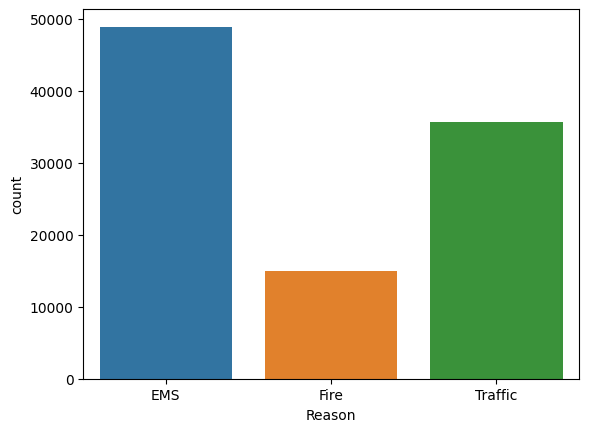

In [45]:
# seaborn to create a countplot of 911 calls by Reason.
sns.countplot(x='Reason',data = df)

5. What is the data type of the objects in the timeStamp column?

In [46]:
type(df['timeStamp'].iloc[0])
#You should have seen that these timestamps are still strings.

str

In [47]:
# Use [pd.to_datetime] to convert the column from strings to DateTime objects.
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.dtypes

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
Reason               object
dtype: object

In [48]:
#use .apply() to create 3 new columns called Hour, Month, and Day of Week.
df['Hour']= df['timeStamp'].apply(lambda x: x.hour)
df['Month']= df['timeStamp'].apply(lambda x:x.month)
df['Day Of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [49]:
# Use the .map() with this dictionary to map the actual string names to the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [50]:
df['Day Of Week']= df['Day Of Week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


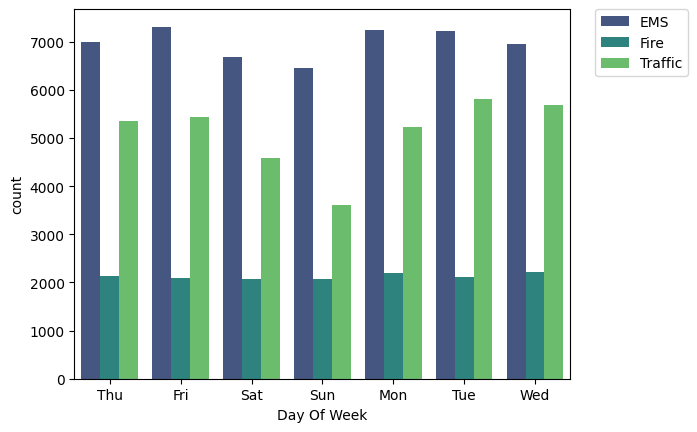

In [51]:
# use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.
sns.countplot(x='Day Of Week',data = df, hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

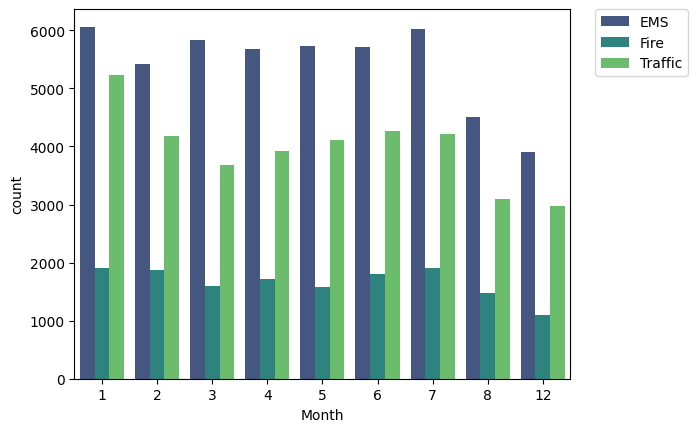

In [52]:
# same for Month
sns.countplot(x='Month',data =df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

6. Did you notice something strange about the Plot?

Answer: You should have noticed it was missing some Months.

In [53]:
# create a gropuby and use the count()
bymonth = df.groupby('Month').count()
bymonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day Of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<Axes: xlabel='Month'>

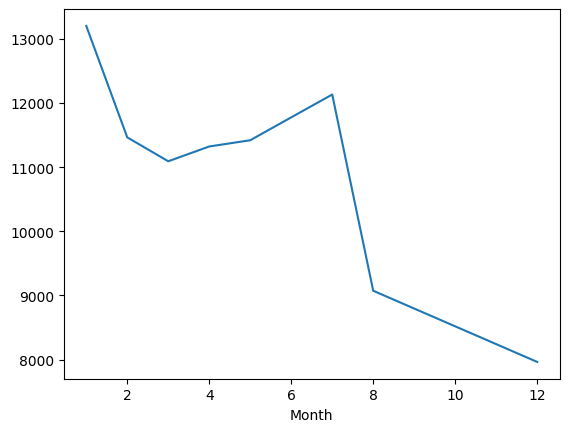

In [54]:
# create a simple plot
bymonth['twp'].plot()

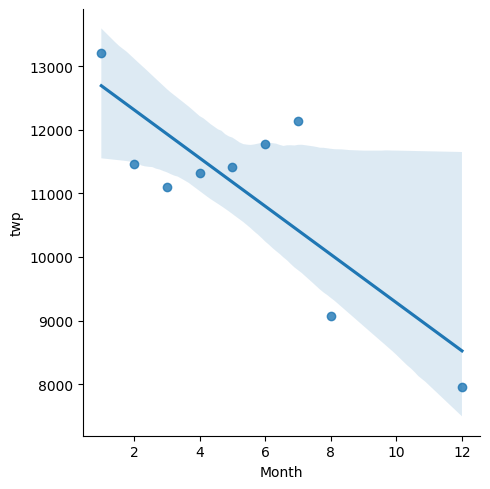

In [55]:
# use seaborn's lmplot() to create a linear fit
sns.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [56]:
# Create a new column called 'Date' that contains the date
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [58]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day Of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


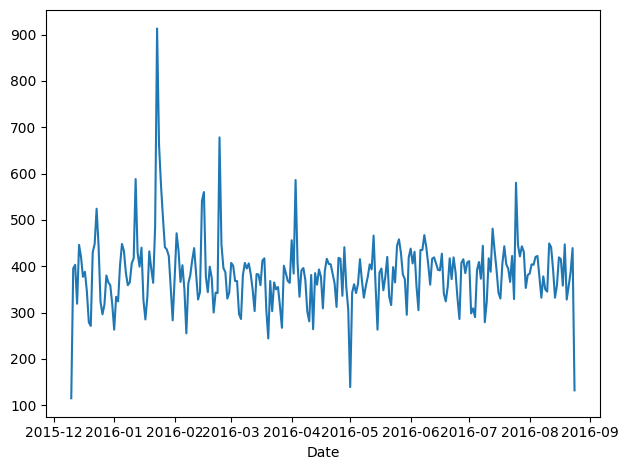

In [59]:
# groupby this Date column with the count()
bydate=df.groupby('Date').count()

# create a plot of counts of 911 calls.
bydate['twp'].plot()
plt.tight_layout()

** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

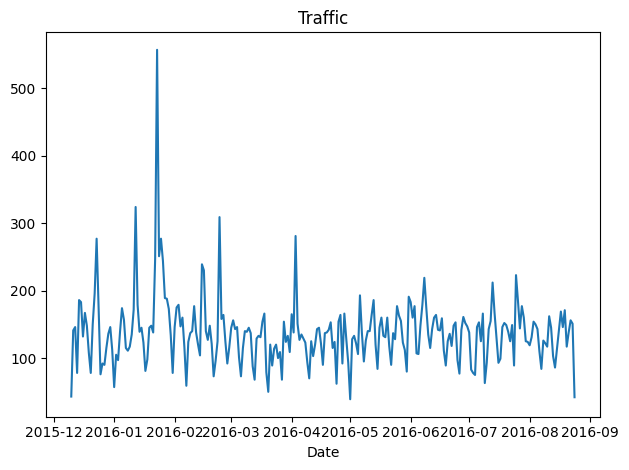

In [60]:
# create 3 separate plots with each plot representing a Reason for the 911 call.

#Traffic
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

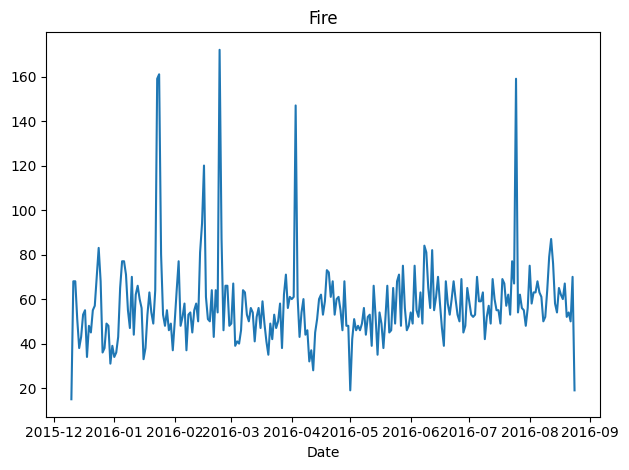

In [61]:
# Fire
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

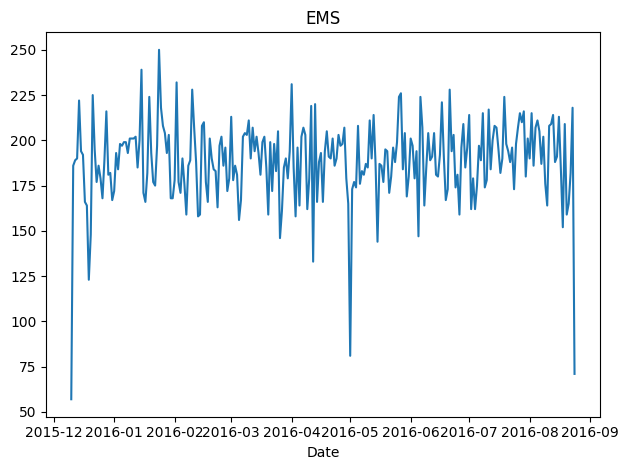

In [62]:
#EMS
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

## Heatmaps 

In [63]:
# restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.
dayHour = df.groupby(by=['Day Of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day Of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


In [64]:
# The corrleation data
dayHour.corr()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Hour,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.935589,0.930491,0.867537,0.831180,0.020182,-0.931775,-0.966550,-0.970266,-0.912628,...,-0.912439,-0.836116,-0.887964,-0.991009,-0.856229,-0.518982,-0.730180,-0.479108,-0.220195,0.298288
1,0.935589,1.000000,0.771454,0.882451,0.838744,0.078645,-0.829828,-0.870170,-0.893598,-0.864438,...,-0.793429,-0.841278,-0.782491,-0.956917,-0.740796,-0.501386,-0.571099,-0.356325,-0.040263,0.279197
2,0.930491,0.771454,1.000000,0.769105,0.670537,-0.065071,-0.894272,-0.940162,-0.912987,-0.830062,...,-0.946143,-0.796030,-0.950230,-0.910547,-0.915221,-0.634581,-0.819726,-0.519012,-0.468533,0.194546
3,0.867537,0.882451,0.769105,1.000000,0.581450,0.347197,-0.773914,-0.760459,-0.837084,-0.895140,...,-0.866321,-0.956423,-0.823132,-0.901660,-0.678677,-0.576998,-0.575335,-0.418914,-0.035020,0.209590
4,0.831180,0.838744,0.670537,0.581450,1.000000,-0.005885,-0.659399,-0.769391,-0.743766,-0.675250,...,-0.680364,-0.586014,-0.659325,-0.810746,-0.679957,-0.179945,-0.692352,-0.568898,-0.233995,0.127708
5,0.020182,0.078645,-0.065071,0.347197,-0.005885,1.000000,0.207054,0.219674,0.145371,0.012476,...,-0.180861,-0.397427,-0.105284,-0.020518,0.282015,0.287900,-0.190778,-0.321510,-0.055331,-0.580367
6,-0.931775,-0.829828,-0.894272,-0.773914,-0.659399,0.207054,1.000000,0.974156,0.977870,0.891198,...,0.790700,0.674500,0.762845,0.916638,0.814675,0.542975,0.523411,0.225282,0.047813,-0.558531
7,-0.966550,-0.870170,-0.940162,-0.760459,-0.769391,0.219674,0.974156,1.000000,0.981168,0.881581,...,0.848447,0.715406,0.843148,0.951857,0.893367,0.577739,0.657660,0.355783,0.214153,-0.431256
8,-0.970266,-0.893598,-0.912987,-0.837084,-0.743766,0.145371,0.977870,0.981168,1.000000,0.953334,...,0.863444,0.762628,0.835176,0.971109,0.882679,0.600641,0.620578,0.377983,0.095945,-0.500932


<Axes: xlabel='Hour', ylabel='Day Of Week'>

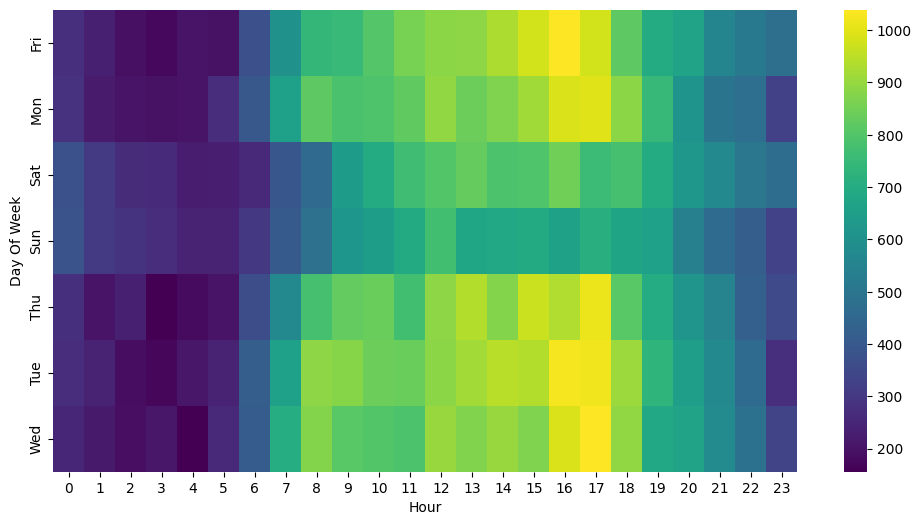

In [65]:
# create a HeatMap Hour
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

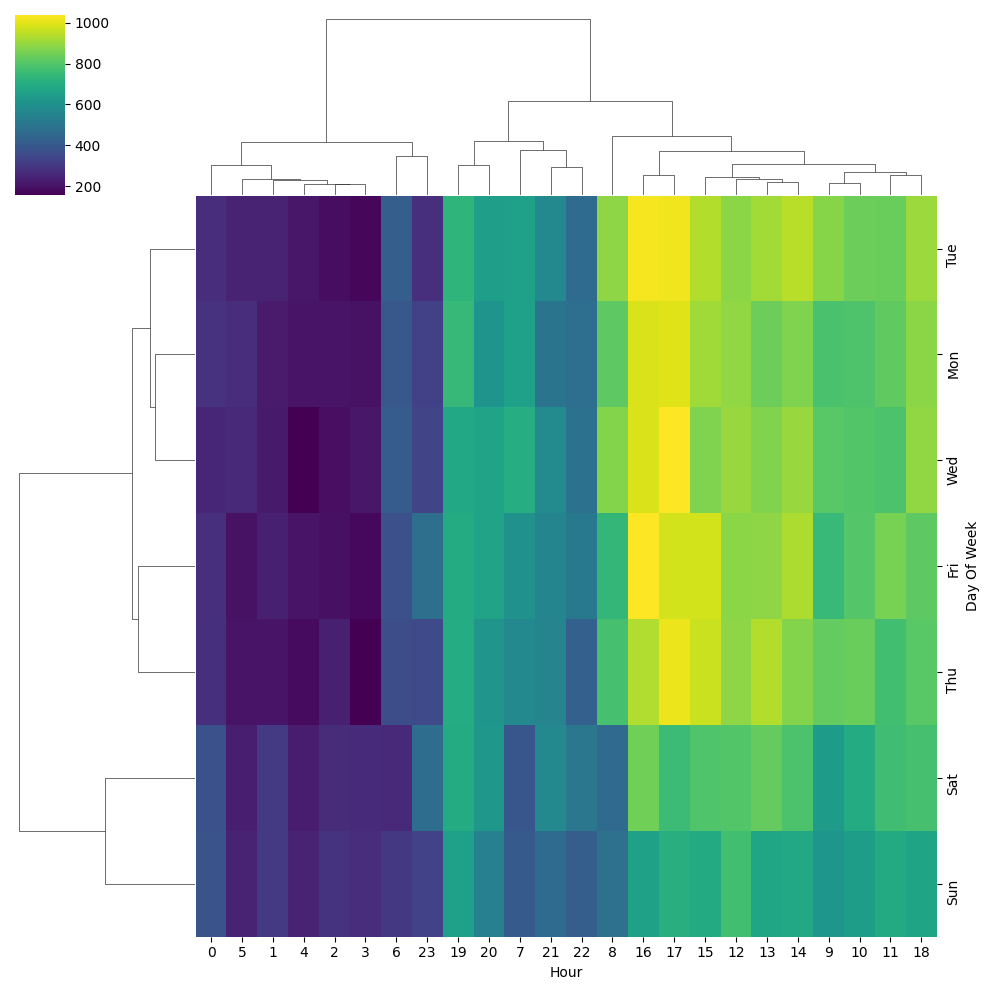

In [66]:
# create a clustermap
sns.clustermap(dayHour,cmap='viridis')

In [67]:
# restructure the dataframe so that the columns become the Month and the Index becomes the Day of the Week.
daymonth=df.groupby(by=['Day Of Week','Month']).count()['Reason'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Day Of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


In [68]:
# The correlation data
daymonth.corr()

Month,1,2,3,4,5,6,7,8,12
Month,,,,,,,,,
1,1.000000,-0.527277,-0.629955,0.302044,-0.198278,-0.788815,0.185571,-0.286960,-0.741567
2,-0.527277,1.000000,0.699301,-0.155837,0.611830,0.589225,-0.030364,0.795890,0.877648
3,-0.629955,0.699301,1.000000,-0.248366,0.538233,0.896291,-0.097519,0.633986,0.909106
4,0.302044,-0.155837,-0.248366,1.000000,-0.040317,-0.135309,0.839668,-0.198609,-0.296147
5,-0.198278,0.611830,0.538233,-0.040317,1.000000,0.194449,0.205832,0.952223,0.588950
6,-0.788815,0.589225,0.896291,-0.135309,0.194449,1.000000,-0.058620,0.306864,0.822045
7,0.185571,-0.030364,-0.097519,0.839668,0.205832,-0.058620,1.000000,0.032275,-0.209609
8,-0.286960,0.795890,0.633986,-0.198609,0.952223,0.306864,0.032275,1.000000,0.735376
12,-0.741567,0.877648,0.909106,-0.296147,0.588950,0.822045,-0.209609,0.735376,1.000000


<Axes: xlabel='Month', ylabel='Day Of Week'>

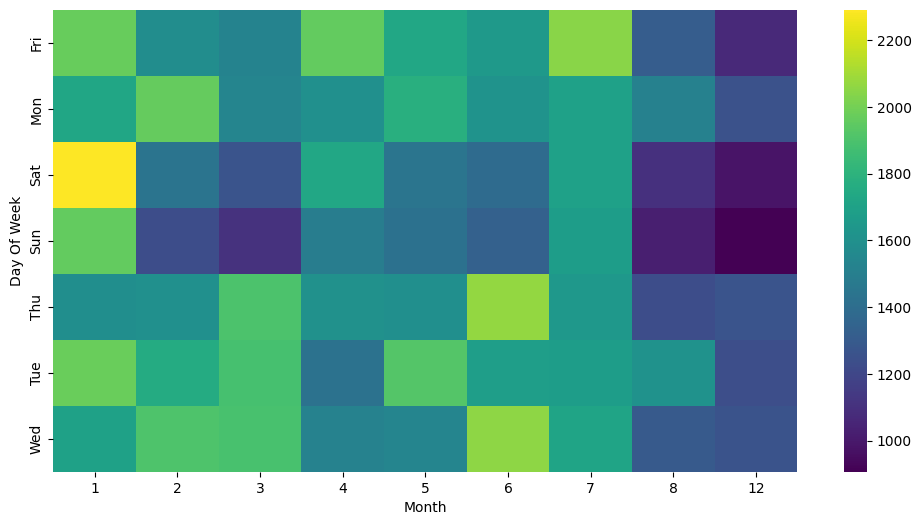

In [69]:
# heatmap month
plt.figure(figsize=(12,6))
sns.heatmap(daymonth,cmap='viridis')

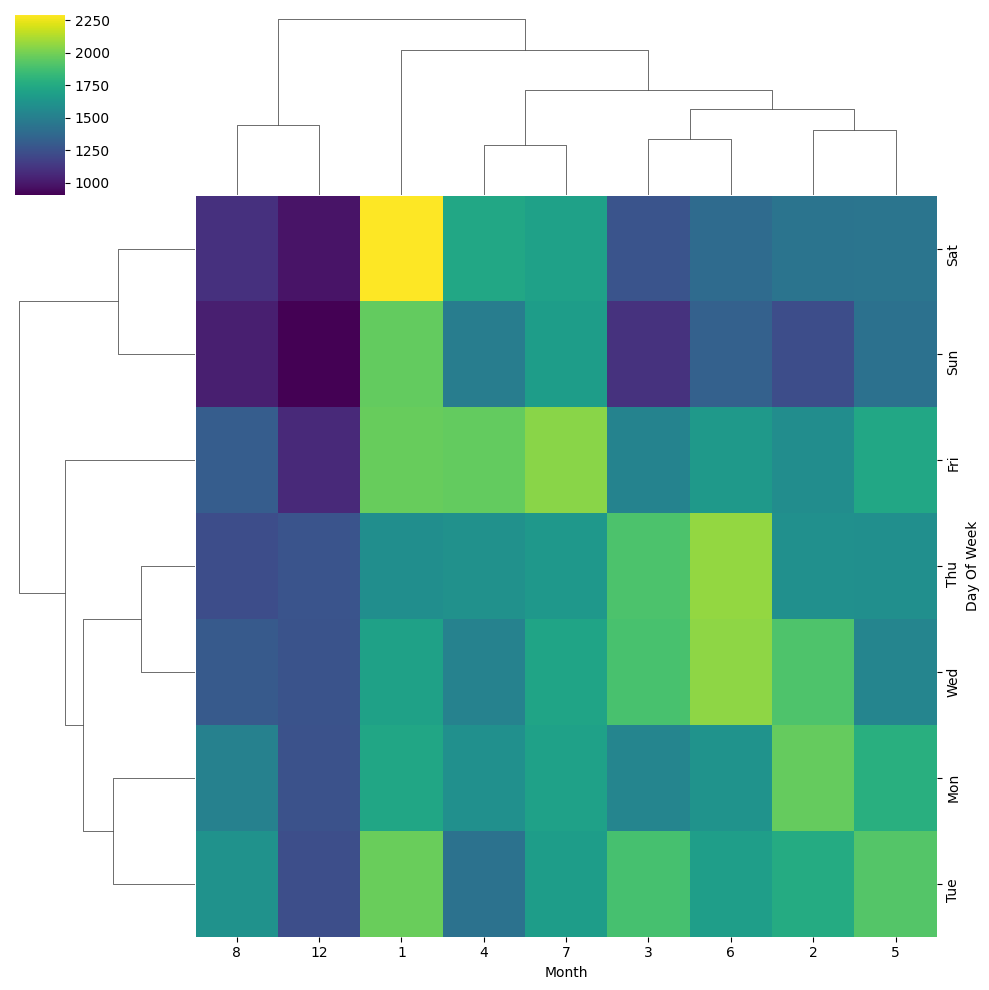

In [70]:
# Cluster map Month
sns.clustermap(daymonth,cmap='viridis')

                                    Continue exploring the Data however you see fit!